<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pandas" data-toc-modified-id="Pandas-1">Pandas</a></span></li><li><span><a href="#Series" data-toc-modified-id="Series-2">Series</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#データへのアクセス" data-toc-modified-id="データへのアクセス-2.0.1">データへのアクセス</a></span></li></ul></li></ul></li><li><span><a href="#DataFrame" data-toc-modified-id="DataFrame-3">DataFrame</a></span><ul class="toc-item"><li><span><a href="#初期化" data-toc-modified-id="初期化-3.1">初期化</a></span></li><li><span><a href="#データへのアクセスの仕方" data-toc-modified-id="データへのアクセスの仕方-3.2">データへのアクセスの仕方</a></span><ul class="toc-item"><li><span><a href="#列にアクセス" data-toc-modified-id="列にアクセス-3.2.1">列にアクセス</a></span></li><li><span><a href="#行にアクセス" data-toc-modified-id="行にアクセス-3.2.2">行にアクセス</a></span></li></ul></li><li><span><a href="#データ選別" data-toc-modified-id="データ選別-3.3">データ選別</a></span><ul class="toc-item"><li><span><a href="#2つのDataFrameを比較する" data-toc-modified-id="2つのDataFrameを比較する-3.3.1">2つのDataFrameを比較する</a></span></li></ul></li><li><span><a href="#共通の部分を探す" data-toc-modified-id="共通の部分を探す-3.4">共通の部分を探す</a></span></li><li><span><a href="#図示" data-toc-modified-id="図示-3.5">図示</a></span></li><li><span><a href="#比較" data-toc-modified-id="比較-3.6">比較</a></span></li></ul></li><li><span><a href="#API" data-toc-modified-id="API-4">API</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#where" data-toc-modified-id="where-4.0.1">where</a></span></li></ul></li></ul></li><li><span><a href="#MultiIndex" data-toc-modified-id="MultiIndex-5">MultiIndex</a></span></li><li><span><a href="#実行速度について" data-toc-modified-id="実行速度について-6">実行速度について</a></span><ul class="toc-item"><li><span><a href="#データの準備" data-toc-modified-id="データの準備-6.1">データの準備</a></span></li></ul></li><li><span><a href="#MultiIndex" data-toc-modified-id="MultiIndex-7">MultiIndex</a></span><ul class="toc-item"><li><span><a href="#列を取得" data-toc-modified-id="列を取得-7.1">列を取得</a></span><ul class="toc-item"><li><span><a href="#1970年のデータを取得" data-toc-modified-id="1970年のデータを取得-7.1.1">1970年のデータを取得</a></span></li><li><span><a href="#1970年の総数を取得" data-toc-modified-id="1970年の総数を取得-7.1.2">1970年の総数を取得</a></span></li><li><span><a href="#アンチパターン" data-toc-modified-id="アンチパターン-7.1.3">アンチパターン</a></span></li><li><span><a href="#xs-メソッド" data-toc-modified-id="xs-メソッド-7.1.4">xs メソッド</a></span></li><li><span><a href="#1970年の複数のカラムを指定" data-toc-modified-id="1970年の複数のカラムを指定-7.1.5">1970年の複数のカラムを指定</a></span></li></ul></li></ul></li></ul></div>

# Pandas

Python Data Analysis Library （Pandas）、データを扱うために使用されるライブラリである。1次元のデータ構造を表現する `Series` と、2次元のテーブルを表す `DataFrame` に分けられる。

In [1]:
import numpy as np
import pandas as pd

# Series

1次元のデータを格納することのできるクラス。

```python
s = pd.Series(data, index=index)
```

- data：一般的なオブジェクトを取れる（dict型、ndarray, 数値）
- index：データのインデックスを指定する

In [2]:
s = pd.Series(np.random.randn(5))
s

0   -0.185884
1    0.252301
2   -0.289638
3    0.902231
4   -1.217606
dtype: float64

`index`引数に任意のリストを渡すと、任意の文字列をインデックスに指定することもできる。

In [3]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

print(s, "\n")
print(s.index)        # index の表示
print(s.index[0])    # indexの0要素目にアクセス
print(len(s.index)) # index配列の長さ

a   -2.146277
b   -0.229142
c   -0.262630
d   -0.153387
e    1.031823
dtype: float64 

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
a
5


pandasではインデックスを一意でない付け方も可能であることに留意。重複したインデックスにアクセスすると、`Series`として取ってこれる。

In [4]:
s = pd.Series(np.random.randn(6), index=list("AABBCC"))
s

A   -0.868996
A   -0.742960
B   -0.173595
B    0.925025
C    0.353791
C    1.488251
dtype: float64

In [5]:
print(type(s["A"]))
print(s["A"])

<class 'pandas.core.series.Series'>
A   -0.868996
A   -0.742960
dtype: float64


dict型から`Serires`を作ることもできる。

In [6]:
pd.Series({"b":1, "a": 0, "c":2})

b    1
a    0
c    2
dtype: int64

### データへのアクセス

In [7]:
s = pd.Series(np.random.randn(5), index=list("ABCDE"))
s

A    0.227446
B   -0.325589
C    0.241404
D   -0.973644
E    0.949251
dtype: float64

In [8]:
print(type(s[0]))
print(type(s["A"]))
print(type(s[0:2]))
print(type(s[[1,2,3]]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


インデックスに無い要素にアクセスすると `KeyError` が出るが、 `get` メソッドを使うことで回避できる。存在しないキーにアクセスしたときに返す値を定義することができる。

In [9]:
s.get(6, np.nan)

nan

インデックス無しで要素にアクセスしたいとき（何か計算したりするとき）、Seriesから単なる配列を取り出すことができる。

In [10]:
s = pd.Series(np.random.randn(5))
s.array

<PandasArray>
[  1.672136393767913,  1.5597954766041164, 0.19153461672425642,
  0.7632269386787063,  0.2739078158753302]
Length: 5, dtype: float64

また、Numpyにも変換することができる。

In [11]:
s.to_numpy()

array([1.67213639, 1.55979548, 0.19153462, 0.76322694, 0.27390782])

In [12]:
s

0    1.672136
1    1.559795
2    0.191535
3    0.763227
4    0.273908
dtype: float64

In [13]:
s > s.median()

0     True
1     True
2    False
3    False
4    False
dtype: bool

# DataFrame

2次元のデータ（=表）を格納することのできるクラス。

- index：行番号
- columns：列番号

## 初期化

In [14]:
df = pd.DataFrame(np.random.randn(6,4))
df

,0,1,2,3
0,1.495560,0.325305,-1.455863,0.007684
1,0.778610,-0.124519,2.384683,-1.090291
2,0.347929,-0.926109,-1.000018,0.887643
3,1.424622,1.444148,-1.669367,1.035799
4,1.083294,0.185178,0.441496,-0.313790
5,0.050881,-0.987254,0.079192,0.501346


デフォルトで列名が数字になっているが、任意の文字列に置き換えることができる （コンストラクタの中でも指定できる）。

In [15]:
df.columns = ['A', 'B', 'C', 'D']
df

,A,B,C,D
0,1.495560,0.325305,-1.455863,0.007684
1,0.778610,-0.124519,2.384683,-1.090291
2,0.347929,-0.926109,-1.000018,0.887643
3,1.424622,1.444148,-1.669367,1.035799
4,1.083294,0.185178,0.441496,-0.313790
5,0.050881,-0.987254,0.079192,0.501346


In [16]:
dates = pd.date_range("20210403", periods=6)
dates

DatetimeIndex(['2021-04-03', '2021-04-04', '2021-04-05', '2021-04-06',
               '2021-04-07', '2021-04-08'],
              dtype='datetime64[ns]', freq='D')

インスタンス化の際に、`index`で行名の指定、`columns`で列の指定を行うことができる。
これを用いることで（事前に決まっているのであれば）、上述のような事をわざわざする必要はなくなる。

In [17]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2021-04-03,0.345398,0.218117,-1.620915,-0.079860
2021-04-04,0.227571,-0.503545,1.424764,-0.110695
2021-04-05,0.120612,0.037614,2.241939,0.642396
2021-04-06,-0.588466,0.307086,0.283708,0.587016
2021-04-07,-2.166563,-1.405613,-1.263236,-1.990693
2021-04-08,-0.500389,1.428037,-0.373322,2.393793


In [18]:
df.head(2) # 適当な数字、もしくは何も指定しない場合は5行表示される

,A,B,C,D
2021-04-03,0.345398,0.218117,-1.620915,-0.079860
2021-04-04,0.227571,-0.503545,1.424764,-0.110695


In [19]:
df.tail(3) # 適当な数字、もしくは何も指定しない場合は5行表示される

,A,B,C,D
2021-04-06,-0.588466,0.307086,0.283708,0.587016
2021-04-07,-2.166563,-1.405613,-1.263236,-1.990693
2021-04-08,-0.500389,1.428037,-0.373322,2.393793


In [20]:
df.index

DatetimeIndex(['2021-04-03', '2021-04-04', '2021-04-05', '2021-04-06',
               '2021-04-07', '2021-04-08'],
              dtype='datetime64[ns]', freq='D')

In [21]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

Seriesと同様、DataFrameもNumPy arrayに変換することができる。変換した場合、インデックスや行ラベルは失われる。

In [22]:
df.to_numpy()

array([[ 0.34539808,  0.21811676, -1.62091518, -0.0798603 ],
       [ 0.22757073, -0.50354455,  1.42476432, -0.11069488],
       [ 0.12061201,  0.03761388,  2.24193913,  0.64239593],
       [-0.58846577,  0.30708637,  0.28370792,  0.58701564],
       [-2.16656349, -1.40561291, -1.2632364 , -1.99069264],
       [-0.50038861,  1.42803661, -0.37332196,  2.39379287]])

In [23]:
df.values

array([[ 0.34539808,  0.21811676, -1.62091518, -0.0798603 ],
       [ 0.22757073, -0.50354455,  1.42476432, -0.11069488],
       [ 0.12061201,  0.03761388,  2.24193913,  0.64239593],
       [-0.58846577,  0.30708637,  0.28370792,  0.58701564],
       [-2.16656349, -1.40561291, -1.2632364 , -1.99069264],
       [-0.50038861,  1.42803661, -0.37332196,  2.39379287]])

DataFrameは非常に便利であるが、`scikit-learn`を使用する際にはぜひNumpyへの変換をおすすめする。現バージョンでは DataFame の入力にも対応しているが、そもそもはNumPyしか対応していなかったことを考えると、NumPyで機械学習を進めていくのが自然である。

## データへのアクセスの仕方

In [24]:
df = pd.DataFrame(np.random.randn(6,4), index=["a", "b", "c", "d", "e", "f"], columns=["A", "B", "C", "D"])
df

,A,B,C,D
a,0.794004,0.225009,-0.466251,0.377774
b,-1.071034,-1.522109,-0.877430,-0.006481
c,-0.439508,-0.318679,0.773417,1.873394
d,-1.108276,-0.768056,-0.198588,0.155640
e,0.076027,1.363055,0.918238,0.842491
f,0.230627,1.542312,-0.605275,-1.760460


### 列にアクセス

単に配列のようにアクセスすると、DataFrameの列を取得することができる。

In [25]:
df["A"]

a    0.794004
b   -1.071034
c   -0.439508
d   -1.108276
e    0.076027
f    0.230627
Name: A, dtype: float64

### 行にアクセス

In [26]:
df.loc["a"]

A    0.794004
B    0.225009
C   -0.466251
D    0.377774
Name: a, dtype: float64

In [27]:
df[0:3] # 1~3行目を表示する

,A,B,C,D
a,0.794004,0.225009,-0.466251,0.377774
b,-1.071034,-1.522109,-0.877430,-0.006481
c,-0.439508,-0.318679,0.773417,1.873394


In [28]:
df["a":"c"]

,A,B,C,D
a,0.794004,0.225009,-0.466251,0.377774
b,-1.071034,-1.522109,-0.877430,-0.006481
c,-0.439508,-0.318679,0.773417,1.873394


In [29]:
df.loc[:, ["A", "B"] ]

,A,B
a,0.794004,0.225009
b,-1.071034,-1.522109
c,-0.439508,-0.318679
d,-1.108276,-0.768056
e,0.076027,1.363055
f,0.230627,1.542312


In [30]:
df.iloc[3:5, 0:2] # 4-5行目かつ、1-2列目のデータ

,A,B
d,-1.108276,-0.768056
e,0.076027,1.363055


## データ選別

条件に合致する要素だけを取り出すこともできる。

In [31]:
df = pd.DataFrame(np.random.randn(6,4), index=["a", "b", "c", "d", "e", "f"], columns=["A", "B", "C", "D"])
df[df["A"]>0] # A列で要素が正のものだけを抽出

,A,B,C,D
b,0.992450,-0.361247,1.212614,0.195807
c,0.507133,0.883188,0.192845,-0.763928
d,1.211858,1.085732,-1.140091,-0.873013


In [32]:
df[df["A"]<0] # A列で要素が負のものだけを抽出

,A,B,C,D
a,-1.028345,-1.614562,-0.250169,-0.391645
e,-0.836773,0.121019,0.897412,-1.702606
f,-0.074432,-0.164967,1.253893,0.110626


### 2つのDataFrameを比較する

比較の際には `compare` メソッドを使用できる（ver 1.1.0から）。このメソッドは構造が同じ （行列が同じ数） データフレームしか比較できないことに留意。

以下の例だと、`df1`がself、`df2`がotherで表示されている。また、各列名は `MultiIndex` として指定されている。

In [33]:
df1 = pd.DataFrame(np.random.randn(3,4))
df2 = pd.DataFrame(np.random.randn(3,4))

df1.compare(df2)

0                   1                   2                   3  \
       self     other      self     other      self     other      self   
0  0.508430  0.399838  0.967064  1.477122  1.714484  0.466883 -0.575536   
1 -0.242015 -1.014789  0.716168 -0.604603 -1.350691  0.723461  0.139947   
2 -0.023421  1.641766 -0.797222  1.131749 -0.250905  0.826673  0.511851   

             
      other  
0  0.011207  
1  0.982076  
2 -0.086416

## 共通の部分を探す

2つのデータフレームに共通している要素（条件を反転させれば片方にしか存在しない要素）を取得するために、`isin` を使用することができる。

In [34]:
data_1 = { "A" : [0,1,2,3,4,5], "B" : [0,1,2,3,4,5], "C": [0,1,2,3,4,5]}
data_2 = { "A" : ["x","x",2,"x","x","x"], "B" : ["x","x",2,"x","x","x"], "C": ["x","x",2,"x","x","x"]}
df1 = pd.DataFrame(data_1)
df2 = pd.DataFrame(data_2)

df1

,A,B,C
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4
5,5,5,5


In [35]:
df2

,A,B,C
0,x,x,x
1,x,x,x
2,2,2,2
3,x,x,x
4,x,x,x
5,x,x,x


以上２つの共通項は、3行目 要素 2だが、`isin` で使用できる。

In [36]:
df1.isin(df2)

,A,B,C
0,False,False,False
1,False,False,False
2,True,True,True
3,False,False,False
4,False,False,False
5,False,False,False


In [37]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four","five"]
df2

,A,B,C,D,E
a,-1.028345,-1.614562,-0.250169,-0.391645,one
b,0.992450,-0.361247,1.212614,0.195807,one
c,0.507133,0.883188,0.192845,-0.763928,two
d,1.211858,1.085732,-1.140091,-0.873013,three
e,-0.836773,0.121019,0.897412,-1.702606,four
f,-0.074432,-0.164967,1.253893,0.110626,five


ここで見たように、新しい列を追加することも簡単にできる。ここでは元のデータフレームを壊したくなかったので、`copy`して新しいデータフレームを作成した。元々はA~Dの列しかなかったが、そこに新たにE列を追加することで、簡単に拡張できる。

In [38]:
df2[df2["E"]=="one"]

,A,B,C,D,E
a,-1.028345,-1.614562,-0.250169,-0.391645,one
b,0.992450,-0.361247,1.212614,0.195807,one


In [39]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
c,0.507133,0.883188,0.192845,-0.763928,two
e,-0.836773,0.121019,0.897412,-1.702606,four


## 図示

In [40]:
import matplotlib.pyplot as plt
plt.close("all")

In [41]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts

2000-01-01   -1.242635
2000-01-02   -0.329176
2000-01-03    0.139202
2000-01-04    1.059577
2000-01-05   -0.093344
                ...   
2002-09-22    1.818098
2002-09-23   -0.799624
2002-09-24   -0.345278
2002-09-25    1.223232
2002-09-26   -0.797283
Freq: D, Length: 1000, dtype: float64

In [42]:
ts.cumsum() # cumulative sum = 累積和

2000-01-01    -1.242635
2000-01-02    -1.571811
2000-01-03    -1.432609
2000-01-04    -0.373032
2000-01-05    -0.466376
                ...    
2002-09-22    15.312369
2002-09-23    14.512744
2002-09-24    14.167466
2002-09-25    15.390698
2002-09-26    14.593414
Freq: D, Length: 1000, dtype: float64

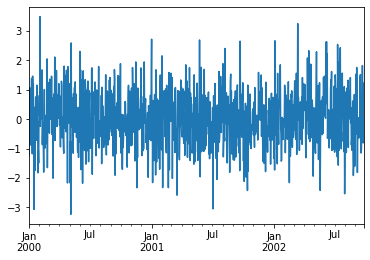

In [43]:
ts.plot()

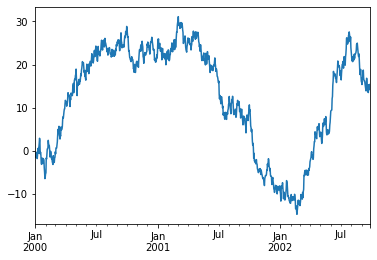

In [44]:
ts = ts.cumsum()
ts.plot()

In [45]:
df = pd.DataFrame(
    np.random.randn(1000, 4), 
    index=ts.index, 
    columns=["A", "B", "C", "D"])
df

,A,B,C,D
2000-01-01,0.636473,0.474069,1.811480,1.518502
2000-01-02,1.119590,0.285934,0.186587,-1.863836
2000-01-03,-0.889534,-1.693335,-0.298394,0.943217
2000-01-04,1.009279,-0.435055,-1.093797,0.323671
2000-01-05,0.704082,1.350555,-1.470909,-0.228720
...,...,...,...,...
2002-09-22,-0.163441,-0.270088,-0.974731,-1.254638
2002-09-23,-0.143139,0.239524,0.200623,-0.531575
2002-09-24,1.546276,0.204379,0.164276,-0.306379
2002-09-25,-0.381430,0.475266,-0.396711,-0.754889


<Figure size 432x288 with 0 Axes>

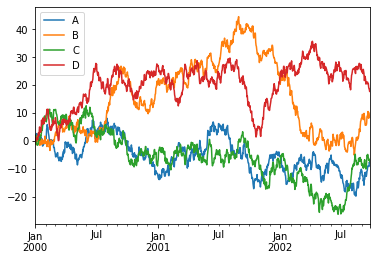

In [46]:
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc="best")

## 比較
- 2つの表を比較して、

In [47]:
np.random.seed(123); df1 = pd.DataFrame(np.random.randn(5,5), columns=list("ABCDE"))
np.random.seed(123); df2_1 = pd.DataFrame(np.random.randn(2,3))
np.random.seed(456); df2_2 = pd.DataFrame(np.random.randn(3,3))
np.random.seed(789); df2_3 = pd.DataFrame(np.random.randn(5,2))

df2 = pd.concat([df2_1.append(df2_2).reset_index(drop=True), df2_3], axis=1)
df2.columns = list("ABCDE")

In [48]:
df1

,A,B,C,D,E
0,-1.085631,0.997345,0.282978,-1.506295,-0.578600
1,1.651437,-2.426679,-0.428913,1.265936,-0.866740
2,-0.678886,-0.094709,1.491390,-0.638902,-0.443982
3,-0.434351,2.205930,2.186786,1.004054,0.386186
4,0.737369,1.490732,-0.935834,1.175829,-1.253881


In [49]:
df2

,A,B,C,D,E
0,-1.085631,0.997345,0.282978,-1.108111,-0.725719
1,-1.506295,-0.578600,1.651437,0.522804,1.234442
2,-0.668129,-0.498210,0.618576,0.096896,-0.987922
3,0.568692,1.350509,1.629589,0.067233,-0.592592
4,0.301966,0.449483,-0.345811,-0.931771,1.055363


In [50]:
df1 == df2

,A,B,C,D,E
0,True,True,True,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [51]:
df_mask = df1==df2
df_mask

,A,B,C,D,E
0,True,True,True,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [52]:
df_mask.where(df_mask==True, 1)

,A,B,C,D,E
0,True,True,True,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


# API
- concat
- reset_index
- df.columns = [x,x,x,...]

### where

# MultiIndex

In [57]:
df = pd.DataFrame({
    "A" : ["a1", "a2", "a3", "a4"],
    "B" : ["b1", "b2", "b3", "b4"],
    "C" : ["c1", "c2", "c3", "c4"],
    "D" : ["d1", "d2", "d3", "d4"],
})
df

,A,B,C,D
0,a1,b1,c1,d1
1,a2,b2,c2,d2
2,a3,b3,c3,d3
3,a4,b4,c4,d4


In [61]:
df.T

,0,1,2,3
A,a1,a2,a3,a4
B,b1,b2,b3,b4
C,c1,c2,c3,c4
D,d1,d2,d3,d4


# 実行速度について

まず pandas の処理は遅い、ということを意識する。そのため pandas を使って高速化を考えることが少しズレている。ただ、ある程度ちゃんと書けば（普段の使用には）十分に早いコーディングを行うことが可能となる。実行速度は

1. numpy でのベクトル処理
2. Series でのベクトル処理
3. `apply()` でのループ処理
4. `itterrows()` でのループ処理
5. インデックスで行方向にループを回す

の順番で遅くなる。

## データの準備

例として用いるデータを準備する

In [65]:
import pandas as pd
from sklearn.datasets import load_iris

df = load_iris()

# MultiIndex

階層的なインデックスの扱い方を以下でまとめる。用いるデータは例として、e-Stat の：

- https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00200524&tstat=000000090001&cycle=0&tclass1=000000090004&tclass2=000000090005&tclass3val=0

から取得した、都道府県別年代別人口推移を利用する（元データから脚注等を削除する修正は加えた）。

このデータは

- 年代別、年齢別の人口が格納されている
- Excel ファイルではヘッダーは年代は4セルにまたがるように結合されており、それを MultiIndexで扱う

47都道府県を表示すると長くなるので、`.head()` を付けて上から5行だけを取得しているが、表示の見た目をイジっているだけで特に処理には影響しない。

In [152]:
df = pd.read_csv("data/05k5-10.csv", header=[0,1], index_col=0)
df.head()

1970                                1971                            \
             総数    0～14歳    15～64   65歳以上        総数    0～14歳    15～64   65歳以上   
日本     103,720   24,823   71,566   7,331   105,014   25,169   72,321   7,524    
北 海 道    5,184    1,309    3,576     299     5,188    1,302    3,577     309    
青 森 県    1,428      397      940      90     1,428      396      939      93    
岩 手 県    1,371      362      909     100     1,364      356      905     103    
宮 城 県    1,819      449    1,245     126     1,837      449    1,260     129    

           1972           ...     1998               1999                    \
             総数    0～14歳  ...    15～64    65歳以上        総数    0～14歳    15～64   
日本     107,332   25,970   ...  86,920   20,508   126,686   18,742   86,758    
北 海 道    5,205    1,302   ...   3,911      958     5,695      808    3,892    
青 森 県    1,432      396   ...     979      266     1,475      227      974    
岩 手 県    1,361      353   ...     915      285     1,414      210      911    
宮 城 県    1,856      451   ...   1,607      381     2,360      359    1,608    

                    2000                             
         65歳以上        総数    0～14歳    15～64    65歳以上  
日本     21,186   126,926   18,505   86,380   22,041   
北 海 道     994     5,683      796    3,851    1,036   
青 森 県     274     1,476      223      965      287   
岩 手 県     293     1,416      213      900      304   
宮 城 県     394     2,365      354    1,602      409   

[5 rows x 124 columns]

## 列を取得

### 1970年のデータを取得

この場合、年代は MultiIndex の `level = 0` の情報なのでいつもどおり括弧だけでアクセスできる。

In [132]:
df["1970"].head()

,総数,0～14歳,15～64,65歳以上
日本,"103,720","24,823","71,566","7,331"
北 海 道,"5,184","1,309","3,576",299
青 森 県,"1,428",397,940,90
岩 手 県,"1,371",362,909,100
宮 城 県,"1,819",449,"1,245",126


### 1970年の総数を取得

MultiIndex の `level=1` のカラムまで指定してアクセスする方法。（カラム名を単に並べて書く一番目の方法は、読み手に対して曖昧さが生じるので推奨されていない。）

In [134]:
df["1970", "総数"].head()

日本       103,720 
北 海 道      5,184 
青 森 県      1,428 
岩 手 県      1,371 
宮 城 県      1,819 
Name: (1970, 総数), dtype: object

In [136]:
df["1970"]["総数"].head()

日本       103,720 
北 海 道      5,184 
青 森 県      1,428 
岩 手 県      1,371 
宮 城 県      1,819 
Name: 総数, dtype: object

In [141]:
df[("1970", "総数")].head()

日本       103,720 
北 海 道      5,184 
青 森 県      1,428 
岩 手 県      1,371 
宮 城 県      1,819 
Name: (1970, 総数), dtype: object

### アンチパターン

しかし、「年代を指定せず、全ての年代の総数を取得したい」と思って以下のようにアクセスしてもエラーとなる。
```python
df["総数"]    # KeyError 
df[,"総数"]    # invalid syntax
df[:,"総数"]   # unhashable type: 'slice'
df[(:,"総数")]    # invalid syntax
```

### xs メソッド

Series/DataFrame の cross-section (xs) を返すことのできるメソッド。これを使うことで、だいたいやりたいことはできる。

In [147]:
# axis = 0 or 1 （デフォルトでは0なので、行名の指定を意味してしまう）
# level = ... （multiindex の level を指定する）
df.xs("総数", axis=1, level=1).head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
日本,"103,720","105,014","107,332","108,710","110,049","111,940","113,089","114,154","115,174","116,133",...,"124,043","124,452","124,764","125,034","125,570","125,864","126,166","126,486","126,686","126,926"
北 海 道,"5,184","5,188","5,205","5,232","5,279","5,338","5,394","5,442","5,488","5,532",...,"5,649","5,659","5,666","5,677","5,692","5,699","5,702","5,700","5,695","5,683"
青 森 県,"1,428","1,428","1,432","1,437","1,444","1,469","1,483","1,494","1,505","1,514",...,"1,477","1,472","1,470","1,471","1,482","1,483","1,480","1,478","1,475","1,476"
岩 手 県,"1,371","1,364","1,361","1,361","1,364","1,386","1,394","1,399","1,405","1,411",...,"1,415","1,414","1,415","1,416","1,420","1,420","1,418","1,416","1,414","1,416"
宮 城 県,"1,819","1,837","1,856","1,883","1,913","1,955","1,982","2,006","2,028","2,054",...,"2,264","2,277","2,290","2,301","2,329","2,338","2,348","2,355","2,360","2,365"


### 1970年の複数のカラムを指定

どうやら xs は複数の列名を指定できないよう。そこで、`loc` を使ってアクセスする。

In [181]:
df.loc[:, (["1970"],  ["総数", "0～14歳"]) ].head()

1970         
             総数    0～14歳
日本     103,720   24,823 
北 海 道    5,184    1,309 
青 森 県    1,428      397 
岩 手 県    1,371      362 
宮 城 県    1,819      449

In [197]:
df.loc[:, pd.IndexSlice["1970", ["総数", "0～14歳"]]].head()

1970         
             総数    0～14歳
日本     103,720   24,823 
北 海 道    5,184    1,309 
青 森 県    1,428      397 
岩 手 県    1,371      362 
宮 城 県    1,819      449

In [196]:
df.loc[:, pd.IndexSlice[["1970", "1971"], ["総数", "0～14歳"]]].head()

1970               1971         
             総数    0～14歳        総数    0～14歳
日本     103,720   24,823   105,014   25,169 
北 海 道    5,184    1,309     5,188    1,302 
青 森 県    1,428      397     1,428      396 
岩 手 県    1,371      362     1,364      356 
宮 城 県    1,819      449     1,837      449

In [191]:
df.loc[:, pd.IndexSlice[:, ["総数", "0～14歳"]]].head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
,総数,総数,総数,総数,総数,総数,総数,総数,総数,総数,...,0～14歳,0～14歳,0～14歳,0～14歳,0～14歳,0～14歳,0～14歳,0～14歳,0～14歳,0～14歳
日本,"103,720","105,014","107,332","108,710","110,049","111,940","113,089","114,154","115,174","116,133",...,"21,904","21,364","20,841","20,415","20,033","19,686","19,366","19,059","18,742","18,505"
北 海 道,"5,184","5,188","5,205","5,232","5,279","5,338","5,394","5,442","5,488","5,532",...,"1,000",971,940,915,900,876,854,831,808,796
青 森 県,"1,428","1,428","1,432","1,437","1,444","1,469","1,483","1,494","1,505","1,514",...,278,268,260,253,253,245,240,234,227,223
岩 手 県,"1,371","1,364","1,361","1,361","1,364","1,386","1,394","1,399","1,405","1,411",...,260,251,243,237,239,232,224,217,210,213
宮 城 県,"1,819","1,837","1,856","1,883","1,913","1,955","1,982","2,006","2,028","2,054",...,430,420,410,400,395,385,376,367,359,354


In [193]:
df.loc(axis=1)[pd.IndexSlice[:, ["総数", "0～14歳"]]].head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
,総数,総数,総数,総数,総数,総数,総数,総数,総数,総数,...,0～14歳,0～14歳,0～14歳,0～14歳,0～14歳,0～14歳,0～14歳,0～14歳,0～14歳,0～14歳
日本,"103,720","105,014","107,332","108,710","110,049","111,940","113,089","114,154","115,174","116,133",...,"21,904","21,364","20,841","20,415","20,033","19,686","19,366","19,059","18,742","18,505"
北 海 道,"5,184","5,188","5,205","5,232","5,279","5,338","5,394","5,442","5,488","5,532",...,"1,000",971,940,915,900,876,854,831,808,796
青 森 県,"1,428","1,428","1,432","1,437","1,444","1,469","1,483","1,494","1,505","1,514",...,278,268,260,253,253,245,240,234,227,223
岩 手 県,"1,371","1,364","1,361","1,361","1,364","1,386","1,394","1,399","1,405","1,411",...,260,251,243,237,239,232,224,217,210,213
宮 城 県,"1,819","1,837","1,856","1,883","1,913","1,955","1,982","2,006","2,028","2,054",...,430,420,410,400,395,385,376,367,359,354


In [195]:
df.loc[:, (slice(None), ("総数", "0～14歳"))].head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
,総数,総数,総数,総数,総数,総数,総数,総数,総数,総数,...,0～14歳,0～14歳,0～14歳,0～14歳,0～14歳,0～14歳,0～14歳,0～14歳,0～14歳,0～14歳
日本,"103,720","105,014","107,332","108,710","110,049","111,940","113,089","114,154","115,174","116,133",...,"21,904","21,364","20,841","20,415","20,033","19,686","19,366","19,059","18,742","18,505"
北 海 道,"5,184","5,188","5,205","5,232","5,279","5,338","5,394","5,442","5,488","5,532",...,"1,000",971,940,915,900,876,854,831,808,796
青 森 県,"1,428","1,428","1,432","1,437","1,444","1,469","1,483","1,494","1,505","1,514",...,278,268,260,253,253,245,240,234,227,223
岩 手 県,"1,371","1,364","1,361","1,361","1,364","1,386","1,394","1,399","1,405","1,411",...,260,251,243,237,239,232,224,217,210,213
宮 城 県,"1,819","1,837","1,856","1,883","1,913","1,955","1,982","2,006","2,028","2,054",...,430,420,410,400,395,385,376,367,359,354
